# NPB_Team_Batting_Stats_Analysis


Google Driveへのマウント

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


データの読み込みとクレンジング

In [18]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

# 日本語表示用（Colabで実行する場合）
!pip install japanize-matplotlib
import japanize_matplotlib

# データの読み込みとクレンジング
def load_and_clean_data(file_path):
    data = []
    current_year = None
    current_league = None

    with open(file_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()

    for line in lines:
        line = line.strip()
        if not line or line.startswith("URL:"):
            # URLから年度とリーグを抽出
            year_match = re.search(r'/(\d{4})/', line)
            league_match = re.search(r'tmb_([cp])\.html', line)
            if year_match: current_year = int(year_match.group(1))
            if league_match: current_league = "セ・リーグ" if league_match.group(1) == 'c' else "パ・リーグ"
            continue

        if line.startswith("チーム,"):
            header = line.split(',')
            continue

        cols = line.split(',')
        if len(cols) == len(header):
            row = {'年度': current_year, 'リーグ': current_league}
            for h, val in zip(header, cols):
                try:
                    row[h] = float(val) if '.' in val else int(val)
                except ValueError:
                    row[h] = val
            data.append(row)

    return pd.DataFrame(data)

# ファイルを読み込む（アップロードしたファイル名を指定）
df = load_and_clean_data('/content/drive/MyDrive/Colab Notebooks/NPB_Team_Batting_Stats_Analysis/scraped_baseball_stats.csv')
df.head()

,年度,リーグ,チーム,打率,試合,打席,打数,得点,安打,二塁打,...,盗塁刺,犠打,犠飛,四球,故意四,死球,三振,併殺打,長打率,出塁率
0,2015,セ・リーグ,ヤクルト,0.257,143,5423,4817,574,1240,223,...,29,104,31,433,4,37,909,96,0.377,0.322
1,2015,セ・リーグ,中 日,0.253,143,5414,4835,473,1222,188,...,33,114,27,401,10,36,1000,83,0.344,0.313
2,2015,セ・リーグ,DeNA,0.249,143,5328,4763,508,1186,219,...,36,137,24,361,7,43,1047,77,0.373,0.306
3,2015,セ・リーグ,阪 神,0.247,143,5373,4705,465,1160,192,...,38,138,28,464,9,38,1001,93,0.343,0.317
4,2015,セ・リーグ,広 島,0.246,143,5386,4752,506,1170,201,...,50,135,29,441,12,29,1082,87,0.368,0.312


2015年度から2025年度までのセ・リーグとパ・リーグそれぞれの年間平均成績

In [19]:
grouped_stats = df.groupby(['年度', 'リーグ']).mean(numeric_only=True)
print(grouped_stats)

                  打率     試合           打席           打数          得点  \
年度   リーグ                                                            
2015 セ・リーグ  0.249167  143.0  5371.333333  4757.333333  502.500000   
     パ・リーグ  0.255833  143.0  5448.333333  4790.166667  573.333333   
2016 セ・リーグ  0.253000  143.0  5436.166667  4829.833333  562.500000   
     パ・リーグ  0.259500  143.0  5486.333333  4797.166667  583.500000   
2017 セ・リーグ  0.250667  143.0  5427.000000  4808.000000  569.666667   
     パ・リーグ  0.250500  143.0  5393.500000  4752.000000  573.333333   
2018 セ・リーグ  0.258833  143.0  5509.833333  4850.000000  625.166667   
     パ・リーグ  0.253667  143.0  5452.000000  4807.500000  609.666667   
2019 セ・リーグ  0.252500  143.0  5467.166667  4824.833333  601.166667   
     パ・リーグ  0.251500  143.0  5465.333333  4796.666667  616.333333   
2020 セ・リーグ  0.253833  120.0  4515.500000  4000.500000  493.666667   
     パ・リーグ  0.246000  120.0  4513.333333  3926.666667  493.833333   
2021 セ・リーグ  0.250333  143.0  5279.

2015年度から2025年度までのセ・リーグとパ・リーグそれぞれの本塁打数の年度別推移を比較するグラフ


In [20]:
home_runs_by_year_league = grouped_stats[['本塁打']].reset_index()
print(home_runs_by_year_league.head())

     年度    リーグ         本塁打
0  2015  セ・リーグ   95.166667
1  2015  パ・リーグ  107.833333
2  2016  セ・リーグ  118.833333
3  2016  パ・リーグ  104.666667
4  2017  セ・リーグ  119.666667


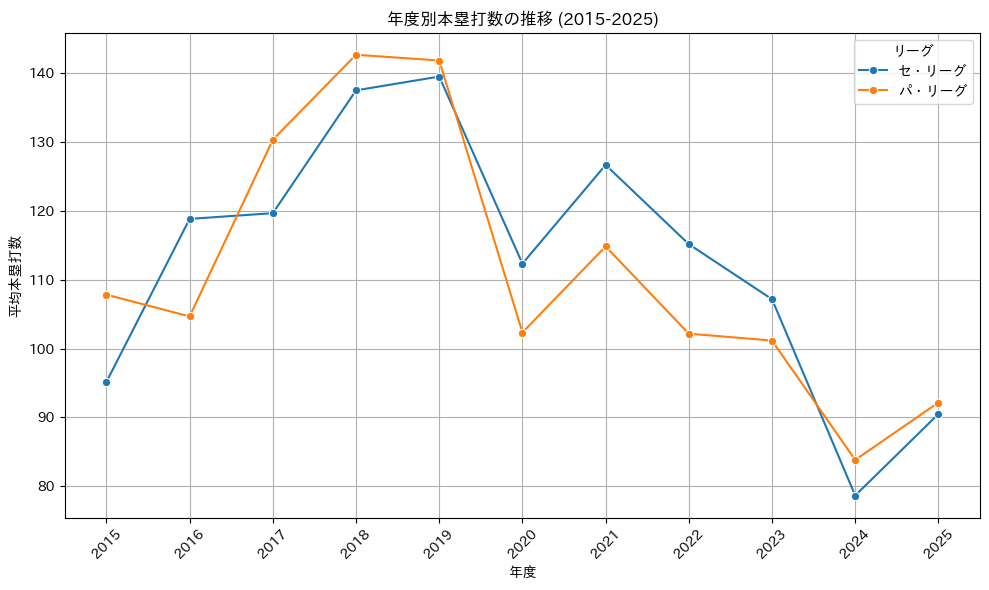

In [21]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=home_runs_by_year_league, x='年度', y='本塁打', hue='リーグ', marker='o')
plt.title('年度別本塁打数の推移 (2015-2025)')
plt.xlabel('年度')
plt.ylabel('平均本塁打数')
plt.grid(True)
plt.legend(title='リーグ')
plt.xticks(home_runs_by_year_league['年度'].unique(), rotation=45)
plt.tight_layout()
plt.show()

巨人の本塁打数


In [22]:
display(giants_home_runs_by_year)

,年度,本塁打
5,2015,98
8,2016,128
14,2017,113
21,2018,152
25,2019,183
32,2020,135
40,2021,169
47,2022,163
48,2023,164
55,2024,81


巨人の年度別本塁打数の推移

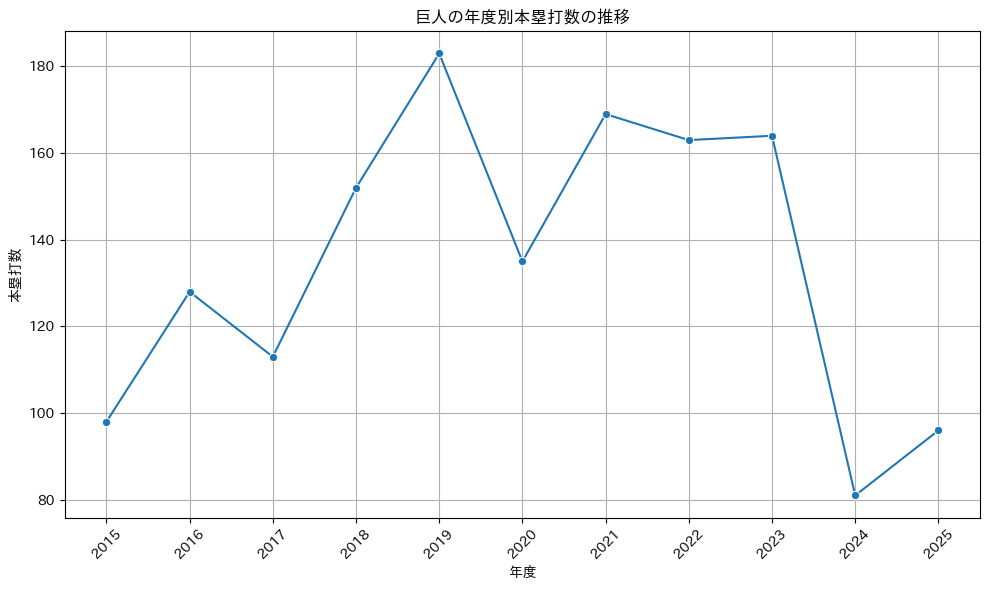

In [23]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=giants_home_runs_by_year, x='年度', y='本塁打', marker='o')
plt.title('巨人の年度別本塁打数の推移')
plt.xlabel('年度')
plt.ylabel('本塁打数')
plt.grid(True)
plt.xticks(giants_home_runs_by_year['年度'].unique(), rotation=45)
plt.tight_layout()
plt.show()

阪神の本塁打数


In [24]:
hanshin_df = df[df['チーム'].isin(['阪神', '阪　神'])]
hanshin_home_runs_by_year = hanshin_df[['年度', '本塁打']]
display(hanshin_home_runs_by_year)

,年度,本塁打
3,2015,78
11,2016,90
15,2017,113
22,2018,85
27,2019,94
34,2020,110
39,2021,121
46,2022,84
50,2023,84
58,2024,67


阪神の年度別本塁打数の推移

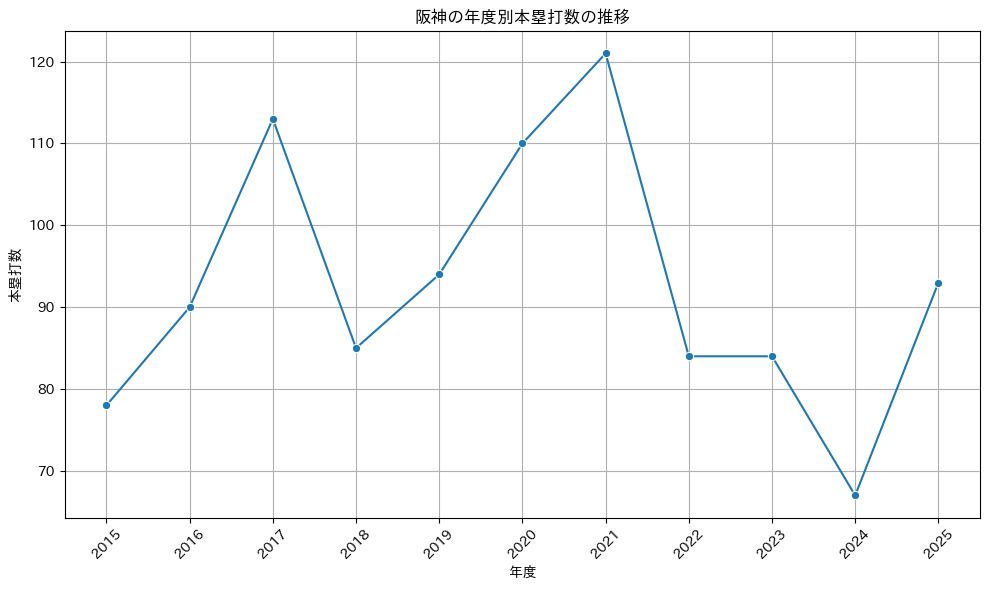

In [25]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=hanshin_home_runs_by_year, x='年度', y='本塁打', marker='o')
plt.title('阪神の年度別本塁打数の推移')
plt.xlabel('年度')
plt.ylabel('本塁打数')
plt.grid(True)
plt.xticks(hanshin_home_runs_by_year['年度'].unique(), rotation=45)
plt.tight_layout()
plt.show()